In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
import scipy

In [3]:
from sklearn import datasets, linear_model, preprocessing
digits = datasets.load_digits()
images = digits.images
labels = digits.target
images.shape

(1797, 8, 8)

In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
mnist.data.shape

(70000, 784)

In [5]:
Xdig = mnist.data
ydig = mnist.target
ydig=ydig.astype('int64')
Xdig=Xdig*2/255-1

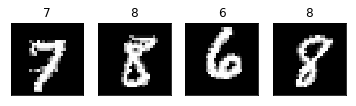

In [6]:
def plt_digit(x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

# Select random digits
nplt = 4
nsamp = Xdig.shape[0]
Iperm = np.random.permutation(nsamp)

# Plot the images using the subplot command
for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(1,nplt,i+1)
    plt_digit(Xdig[ind,:])
    plt.title(ydig[ind])

In [7]:
class ImgException(Exception):
    def __init__(self, msg='No msg'):
        self.msg = msg

In [8]:
import matplotlib.image as mpimg
import skimage.io
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.transform import resize
import matplotlib.patches as mpatches
from skimage import data
import skimage

In [9]:
import os.path
def load_img(char_ind, samp_ind):
    """
    Returns the image from the dataset given a character and sample index.
    
        
    If the file doesn't exist, it raises an Exception with the filename.   
    """ 
    path='/Users/zhongda/Downloads/EnglishHnd/English/Hnd/Img/Sample'+str(char_ind).zfill(3)+'/'
    # TODO:  Set the file name based on char_ind and samp_ind
    # fname = ...
    fname='img'+str(char_ind).zfill(3)+'-'+str(samp_ind).zfill(3)+'.png'
    # TODO:  Use the os.path.isfile command to check if the file exists.  
    # If not raise an ImgException with the message "[fname] not found"
    img=[]
    if(os.path.isfile(path+fname)==False):
        em=fname+' not found'
        raise ImgException(em)
    else:
        img=skimage.io.imread(path+fname)
    return img

In [10]:
def mnist_resize(img):
    """
    Extracts a character from the image, and places in a 28x28 image to match the MNIST format.
    
    Returns:
    img1:  MNIST formatted 28 x 28 size image with the character from img
    box:   A bounding box indicating the locations where the character was found in img.    
    """
    # Image sizes (fixed for now).  To match the MNIST data, the image 
    # will be first resized to 20 x 20.  Then, the image will be placed in center of 28 x 28 box
    # offet by 4 on each side.
    nx_img = 20   
    ny_img = 20
    nx_box = 28   
    ny_box = 28
    offx = 4
    offy = 4
    
    # TODO:  Convert the image to gray scale using the skimage.color.rgb2gray method.
    # bw = ...
    bw=skimage.color.rgb2gray(img)
    # Threshold the image using OTSU threshold
    thresh = threshold_otsu(bw)
    bw = closing(bw < thresh, square(3)).astype(int)
    
    # Get the regions in the image.
    # This creates a list of regions in the image where the digit possibly is.
    regions = regionprops(bw)

    # TODO:  Find region with the largest area.  You can get the region area from region.area.
    # region_max = ...
    area_max=0
    for i in range(len(regions)):
        if area_max<regions[i].area:
            region_max=regions[i]
    area_max=region_max.area
    # Raise an ImgException if no region with area >= 100 was found
    if (area_max < 100):
        raise ImgException("No image found")    
                
    # Get the bounding box of the character from region_max.bbox
    minr, minc, maxr, maxc = region_max.bbox
    box = [minr,minc,maxr,maxc]
    
    # TODO:  Crop the image in bw to the bounding box
    # bw_crop = bw[...]
    bw_crop=bw[minr:maxr,minc:maxc]
        
    # TODO:  Resize the cropped image to a 20x20 using the resize command.
    # You will need to use the mode = 'constant' option
    # bw_resize = ...
    bw_resize=resize(bw_crop*1.0,[20,20],mode='constant')
    
    # TODO:  Threshold back to a 0-1 image by comparing the pixels to their mean value
    s=bw_resize-np.mean(bw_resize)
    img0=(s/abs(s)+1)/2
    # TODO:  Place extracted 20 x 20 image in larger image 28 x 28
    # img1 = ...
    img1=np.zeros([28,28])
    img1[4:24,4:24]=img0
    return img1, box

In [11]:
import random
#Select ndig=5000 random samples from Xdigs and their labels in ydig.
ndig=5000
ind=list(range(70000))
indn = random.sample(ind, ndig)
X=Xdig[indn,:]
y=ydig[indn]
y=y.astype(int)

In [15]:
import pickle
pickle.dump(X,open('X.p', 'wb'))
pkl_file = open('X.p', 'rb')



In [16]:
X = pickle.load(pkl_file)

In [17]:
from sklearn import svm
from sklearn.cross_validation import train_test_split as tts
svc = svm.SVC(probability=True,  kernel="rbf", C=2.8, gamma=.0273)
Xtr,Xts,ytr,yts=tts(X,y,test_size=1/6,random_state=0)
svc.fit(Xtr,ytr)

/Users/zhongda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0273, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
yhat_ts = svc.predict(Xts)
acc = np.mean(yhat_ts == yts)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.949640


In [16]:
import scipy
import scipy.optimize as opt

In [17]:
def Dis(x,x1):
    d=x-x1
    D=((d**2).sum())**0.5
    return D

In [18]:
def c_e(x1,y_prime):
    y1=[0,0,0,0,0,0,0,0,0,0]
    y1[y_prime]=1
    yh=svc.predict_proba([x1,x1])
    ce=-(y1*np.log(yh)).sum()
    return ce

In [23]:
def l_fun(x1,*args):
    x=args[0]
    y_prime=args[1]
    c=args[2]
    ly=svc.predict_proba([x1,x1])[0]
    l_f=c*Dis(x,x1)+c_e(x1,y_prime)
    return l_f

In [24]:
def L_BFGS_B(x,y_prime,c):
    
    initial=np.ones(len(x))
    x1=opt.fmin_l_bfgs_b(l_fun,x0=initial,args=(x,y_prime,c),approx_grad=True)
    x2=x1[0]
    D=Dis(x,x2)
    yh=svc.predict([x2,x2])
    return x2,yh[0],D

In [1]:
x_input = input("x input:")
y_input = input("y prime(eg.[1,2,3,4]):")
E = input("e value")

x input:1
y prime(eg.[1,2,3,4]):[1,2,3]
e value0.01


y=9
the y_prime is 3
C=0.02
C=0.04
Bisection Search start!
C=0.02
C=0.03
C=0.035
the y_prime is 4
C=0.02
C=0.04
C=0.08
C=0.16
C=0.32
C=0.64
C=1.28
C=2.56
C=5.12
C=10.24
Bisection Search start!
C=5.12
C=7.68
C=6.4
C=5.76
C=6.08
C=6.24
C=6.32
C=6.28
C=6.26
C=6.25
the y_prime is 5
C=0.02
C=0.04
C=0.08
C=0.16
C=0.32
C=0.64
C=1.28
C=2.56
C=5.12
Bisection Search start!
C=2.56
C=3.84
C=4.48
C=4.800000000000001
C=4.960000000000001
C=5.040000000000001
C=5.000000000000001
C=5.020000000000001
C=5.010000000000002
C=5.005000000000001


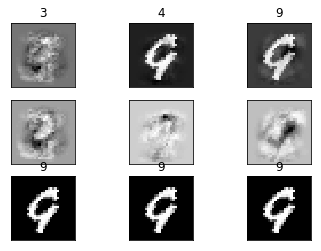

In [37]:
#initial data
x_num=x_input
ind=np.where(y==x_num)[0]
num=random.choice(ind)
x=X[num,:]
print('y={}'.format(y[num]))
y_p=y_input
t_num=length(y_p)
for i in range(t_num):
    y_prime=y_p[i]
    print('the y_prime is {}'.format(i))
    #initalization C
    c =E
    while True:
        c = 2*c
        x_prime,yh,D  = L_BFGS_B(x,y_prime,c)
        print('C={}'.format(c))
        if (yh != y_prime):
            break
            
    ##Bisection Search
    print('Bisection Search start!')
    c_low = 0 
    c_high = c
    while True:

        c_half = (c_high+c_low)/2
        x_prime,yh,D_prime = L_BFGS_B(x,y_prime,c_half)
        print('C={}'.format(c_half))
        if (yh != y_prime):
            D = D_prime
            c_high = c_half
        else:
            c_low = c_half
        if ((c_high - c_low) < E):
            break
    title=svc.predict([x_prime,x])
    plt.subplot(3,t_num,i+1)
    plt_digit(x_prime)
    plt.title(title[0])
    plt.subplot(3,t_num,t_num+1+i)
    plt_digit(x_prime-x)
    plt.subplot(3,t_num,2*t_num+1+i)
    plt_digit(x)
    plt.title(title[1])
plt.savefig("result.png")